### **PROBLEM-1: DECISION TREES**

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [ ]:
cancer = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/lectures/lecture_4/breast_cancer_data.csv")
cancer["label"] = cancer["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_se,symmetry_se,fractal_se,radius_extreme,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
column = cancer["texture_mean"]
max_value = column.max()
min_value = column.min()
print(max_value, min_value)

39.28 9.71


In [ ]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
)

features=["texture_mean"]
label = "label"
dt_model.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(max_depth=3)

In [ ]:
dt_model2 = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
)

features=["texture_mean"]
label = "label"
dt_model2.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree

dt_model3 = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
)
features = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave_mean",
    "symmetry_mean",
    "fractal_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_se",
    "symmetry_se",
    "fractal_se",
    "radius_extreme",
    "texture_extreme",
    "perimeter_extreme",
    "area_extreme",
    "smoothness_extreme",
    "compactness_extreme",
    "concavity_extreme",
    "concave_extreme",
    "symmetry_extreme",
    "fractal_extreme",
]
label = "label"
dt_model3.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(max_depth=3)

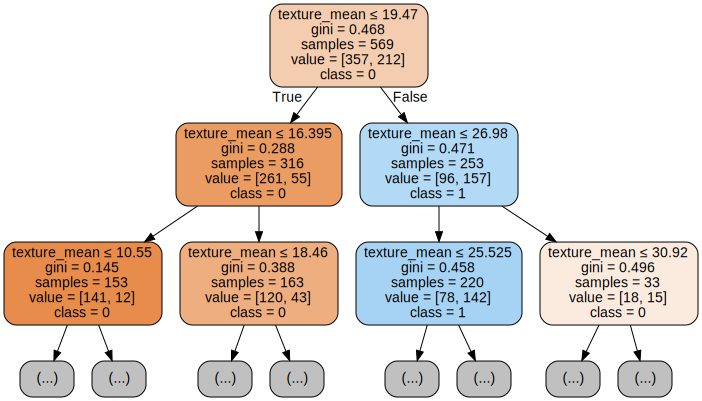

In [ ]:
import graphviz

dot_data = tree.export_graphviz(
    decision_tree=dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=["0", "1"],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=2,
)  
graph = graphviz.Source(dot_data)  
graph.render("cancer_tree")
graph

## **NEURAL NETWORK PROBLEM2**


In [ ]:
from typing import Tuple

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/lectures/lecture_4/breast_cancer_data.csv")
data["label"] = data["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_se,symmetry_se,fractal_se,radius_extreme,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
features = [
    "radius_extreme",
    "texture_extreme",
    "perimeter_extreme",

]
label = "label"

# train test split
#X_raw, X_raw_test, Y, Y_test = train_test_split(data[features].values, data[label].values, test_size=0.2, random_state=42)
X_raw= data[features].values
Y= data[label].values
# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)
X_test = scaler.transform(X_raw_test)

# formatting
Y = Y.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

In [ ]:
def sigmoid(x):
    """Calculates sigmoid function."""
    return 1. / (1 + np.exp(-x))

def reLU(x):
    return np.maximum(0.0,x)

# parameters for the first layer
W_1 = np.ones((5, X.shape[1]))
print(f"Shape of W_1 is {W_1.shape}")

b_1 = np.ones((5, 1))*0.1
print(f"Shape of b_1 is {b_1.shape}")

# parameters for the second layer
W_2 = np.ones((1, 5))
print(f"Shape of W_2 is {W_2.shape}")

b_2 = np.ones((1, 1))*0.1
print(f"Shape of b_1 is {b_2.shape}")

# calculate the forward propagation
Z_1 = X @ W_1.T
print(f"\nShape of Z_1 is {Z_1.shape}")
print("Samples for Z_1:")
print(Z_1[:5])

A_1 = reLU(Z_1 + b_1.T) 
print(f"Shape of A_1 is {A_1.shape}")
print("Samples for A_1:")
print(A_1[:5])

Z_2 = A_1 @ W_2.T
print(f"\nShape of Z_2 is {Z_2.shape}")
print("Samples for Z_2:")
print(Z_1[:5])

A_2 = Y_hat = sigmoid(Z_2 + b_2.T)
print(f"Shape of A_2 is {A_2.shape}")
print("Samples for A_2:")
print(A_2[:5])

Shape of W_1 is (5, 3)
Shape of b_1 is (5, 1)
Shape of W_2 is (1, 5)
Shape of b_1 is (1, 1)

Shape of Z_1 is (569, 5)
Samples for Z_1:
[[ 2.83099678  2.83099678  2.83099678  2.83099678  2.83099678]
 [ 2.97185021  2.97185021  2.97185021  2.97185021  2.97185021]
 [ 2.83537107  2.83537107  2.83537107  2.83537107  2.83537107]
 [-0.39741967 -0.39741967 -0.39741967 -0.39741967 -0.39741967]
 [ 1.17034432  1.17034432  1.17034432  1.17034432  1.17034432]]
Shape of A_1 is (569, 5)
Samples for A_1:
[[2.93099678 2.93099678 2.93099678 2.93099678 2.93099678]
 [3.07185021 3.07185021 3.07185021 3.07185021 3.07185021]
 [2.93537107 2.93537107 2.93537107 2.93537107 2.93537107]
 [0.         0.         0.         0.         0.        ]
 [1.27034432 1.27034432 1.27034432 1.27034432 1.27034432]]

Shape of Z_2 is (569, 1)
Samples for Z_2:
[[ 2.83099678  2.83099678  2.83099678  2.83099678  2.83099678]
 [ 2.97185021  2.97185021  2.97185021  2.97185021  2.97185021]
 [ 2.83537107  2.83537107  2.83537107  2.835371

In [ ]:
print(np.mean(Y_hat))

loss = -np.mean(np.multiply(Y, np.log(Y_hat)) + np.multiply(1 - Y, np.log(1 - Y_hat+1E-16)))

0.7134461335701504


In [ ]:
loss

0.6811257843182167